<a href="https://colab.research.google.com/github/argyaWicaksana/PCVK-College/blob/main/Week10_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Argya Wicaksana
# TI3B / 06

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

In [77]:
gradient_img = cv2.imread('/content/gradient.jpg')

## Global Threshold

In [78]:
def global_threshold(image, method):
  threshold = 170
  image = np.array(image)

  if method == 'BINARY':
    segmented_image = np.where(image < threshold, 0, 255)
  elif method == 'BINARY_INV':
    segmented_image = np.where(image > threshold, 0, 255)
  elif method == 'TRUNC':
    segmented_image = np.where(image > threshold, threshold, image)
  elif method == 'TOZERO':
    segmented_image = np.where(image < threshold, 0, image)
  elif method == 'TOZERO_INV':
    segmented_image = np.where(image > threshold, 0, image)


  return segmented_image

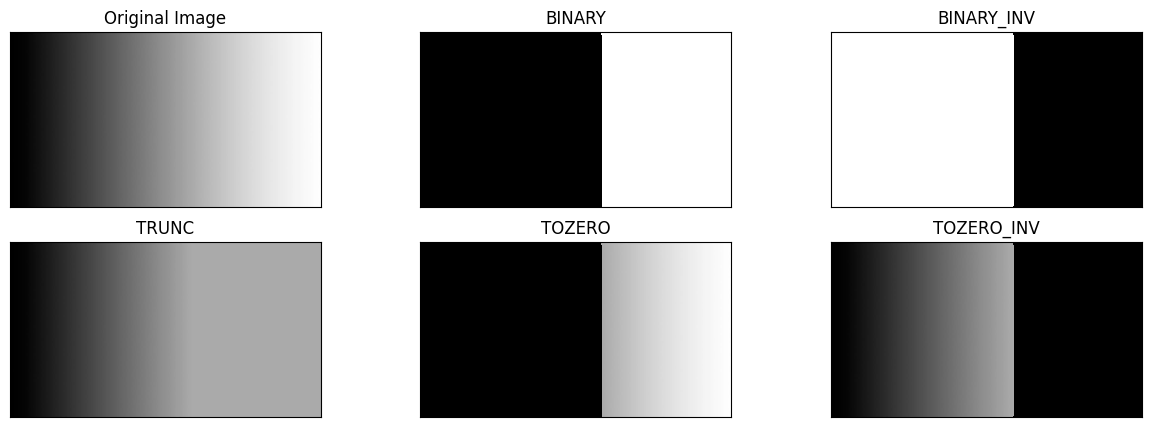

In [79]:
titles1 = [
    'Original Image',
    'BINARY',
    'BINARY_INV',
    'TRUNC',
    'TOZERO',
    'TOZERO_INV',
]
global_threshold_img = [
    gradient_img,
    global_threshold(gradient_img, 'BINARY'),
    global_threshold(gradient_img, 'BINARY_INV'),
    global_threshold(gradient_img, 'TRUNC'),
    global_threshold(gradient_img, 'TOZERO'),
    global_threshold(gradient_img, 'TOZERO_INV'),
]


plt.figure(figsize=(15, 5))

for i in range(len(global_threshold_img)):
    plt.subplot(2, 3, i + 1), plt.imshow(global_threshold_img[i], 'gray', interpolation='nearest')
    plt.title(titles1[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Otsu Thresholding

In [80]:
balloon_img = cv2.imread('/content/balloon.jpg', cv2.IMREAD_GRAYSCALE)

In [81]:
def otsu_threshold(image):
  if len(image.shape) == 3:
    image = np.mean(image, axis=2).astype(np.uint8)

  # Set total number of bins in the histogram
  bins_num = 256

  # Get the image histogram
  hist, bin_edges = np.histogram(image, bins=bins_num)

  # Calculate centers of bins
  bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

  # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
  weight1 = np.cumsum(hist)
  weight2 = np.cumsum(hist[::-1])[::-1]

  # Get the class means mu0(t)
  mean1 = np.cumsum(hist * bin_mids) / weight1
  # Get the class means mu1(t)
  mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

  inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

  # Maximize the inter_class_variance function val
  index_of_max_val = np.argmax(inter_class_variance)

  threshold = bin_mids[:-1][index_of_max_val]

  thresholded_image = (image > threshold) * 255

  return thresholded_image

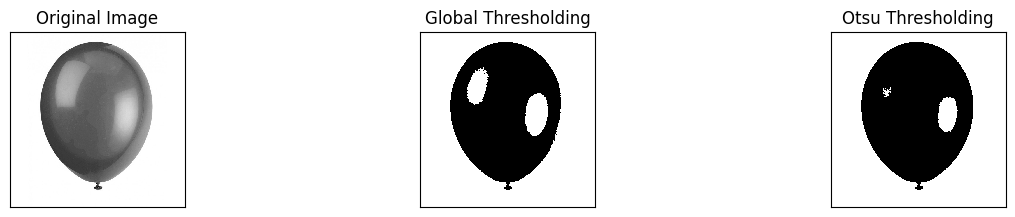

In [82]:
titles2 = [
    'Original Image',
    'Global Thresholding',
    'Otsu Thresholding',
]

otsu_threshold_img = [
    balloon_img,
    global_threshold(balloon_img, 'BINARY'),
    otsu_threshold(balloon_img),
]


plt.figure(figsize=(15, 5))

for i in range(len(otsu_threshold_img)):
    plt.subplot(2, 3, i + 1), plt.imshow(otsu_threshold_img[i], 'gray', interpolation='nearest')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja

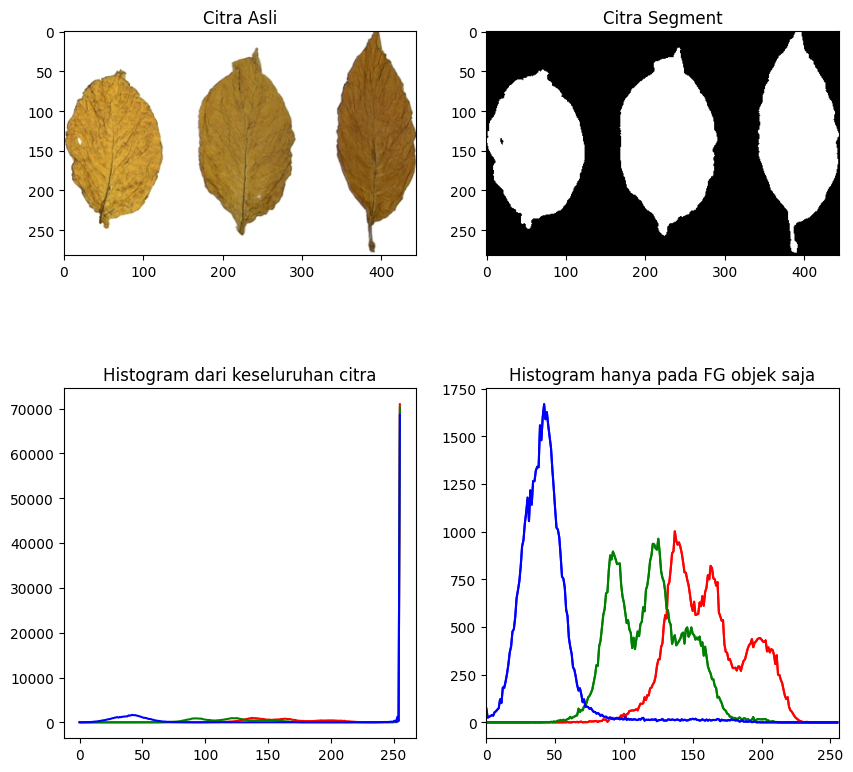

In [83]:
tobacco_img = cv2.imread('/content/tobacco.jpg')
tobacco_img = cv2.cvtColor(tobacco_img,cv2.COLOR_BGR2RGB)
tobacco_img_gray = cv2.cvtColor(tobacco_img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(tobacco_img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(tobacco_img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([tobacco_img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([tobacco_img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([tobacco_img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

## Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


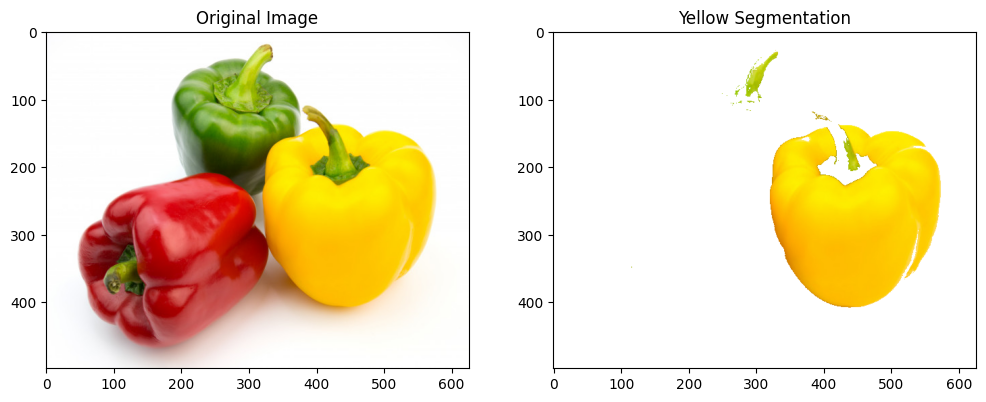

In [84]:
peppers_img = cv2.imread('/content/peppers.jpg')
peppers_img_rgb = cv2.cvtColor(peppers_img, cv2.COLOR_BGR2RGB)

# Convert the image to a 2D array of pixels
pixels = peppers_img_rgb.reshape((-1, 3))

# Define the number of clusters (in this case, for yellow color)
num_clusters = 5  # Adjust this value as needed

# Create the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel data
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Find the cluster that represents the yellow color
yellow_cluster = None
min_distance = float('inf')

for i, color in enumerate(colors):
    # Define a reference yellow color
    reference_yellow = np.array([255, 255, 0], dtype=np.uint8)

    # Calculate the Euclidean distance between the color and reference_yellow
    distance = np.linalg.norm(color - reference_yellow)

    if distance < min_distance:
        min_distance = distance
        yellow_cluster = i

# Create a mask for the yellow cluster
yellow_mask = (kmeans.labels_ == yellow_cluster)

# Reshape the mask to match the image dimensions
yellow_mask = yellow_mask.reshape(peppers_img.shape[0], peppers_img.shape[1])

# Create a white background image
white_background = np.full_like(peppers_img, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the white background
output_image = np.where(yellow_mask[..., None], peppers_img, white_background)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(peppers_img_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)), plt.title('Yellow Segmentation')
plt.show()


## Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda.

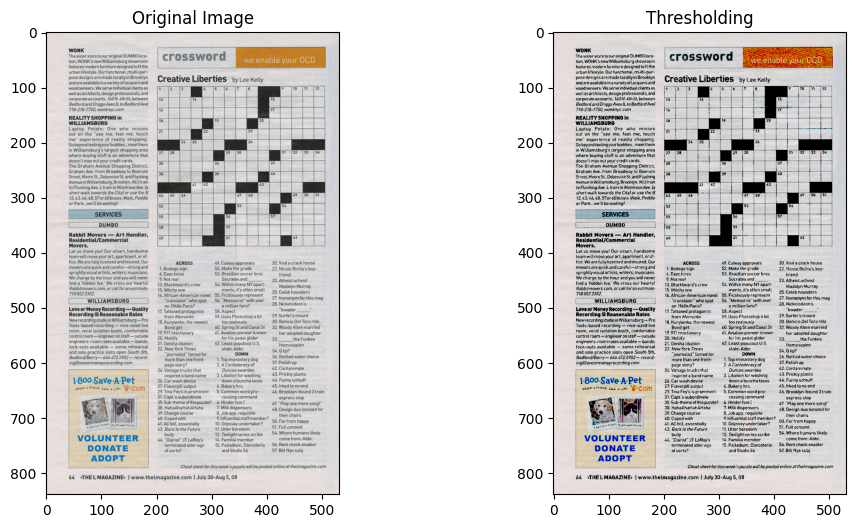

In [85]:
crossword_img = cv2.imread('/content/crossword.jpg')
crossword_img = cv2.cvtColor(crossword_img, cv2.COLOR_BGR2RGB)

thresh = cv2.threshold(crossword_img, 125, 255, cv2.THRESH_TOZERO)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(crossword_img), plt.title('Original Image')
plt.subplot(122), plt.imshow(thresh[1]), plt.title('Thresholding')
plt.show()